In [2]:
from collections import Counter
from numpy import mean, std
import numpy as np
from pandas import read_csv
import pandas as pd
import gdown
import seaborn as sns

import copy
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import fbeta_score, f1_score,precision_score,recall_score,accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import DistanceMetric
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier


import os
import warnings
warnings.filterwarnings('ignore')
from credit_data_actual_values import substitute

In [3]:
url = 'https://drive.google.com/uc?id=' + '1WC-3iPQJrud1WTer883rYdHMHGqgIVJ9' #(URI ID)
output = 'C:\Datascience\data\german.data' # Destination directory
gdown.download(url, output, quiet=False) 

Downloading...
From: https://drive.google.com/uc?id=1WC-3iPQJrud1WTer883rYdHMHGqgIVJ9
To: C:\Datascience\data\german.data
100%|█████████████████████████████████████████████████████████████████████████████| 79.8k/79.8k [00:00<00:00, 1.17MB/s]


'C:\\Datascience\\data\\german.data'

In [4]:
#Load the data using pandas read_csv method
df=read_csv(output, sep=" ", header=None)


In [5]:
# Make replica of the data for converting all the attribute values into human readable form
df_vis = copy.deepcopy(df)
# Call the method substitute from credit_data_actual_values.py to display the real world values
df_vis = substitute(df_vis)
df_vis

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,...,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,...,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid back duly till now,furniture/equipment,1736,<100 DM,4<= <7 years,3,female:divorced/separated/married,none,...,real estate,31,none,own,1,unskilled - resident,1,none,yes,Good Risk
996,<0 DM,30,existing credits paid back duly till now,car (used),3857,<100 DM,1<= < 4 years,4,male:divorced/separated,none,...,savings agreement/life insurance,40,none,own,1,management/ highly qualified employee,1,yes,yes,Good Risk
997,no checking account,12,existing credits paid back duly till now,radio/television,804,<100 DM,>=7 years,4,male:single,none,...,car or other,38,none,own,1,skilled employee / official,1,none,yes,Good Risk
998,<0 DM,45,existing credits paid back duly till now,radio/television,1845,<100 DM,1<= < 4 years,4,male:single,none,...,unknown / no property,23,none,for free,1,skilled employee / official,1,yes,yes,Bad Risk


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,4 mins 04 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_Srinivas_044pp3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.733 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |█
08:09:04.858: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████| 100%


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_AutoML_20210718_080904,0.162989,0.403719,0.162989,0.320803,0.164667,298,0.12089,StackedEnsemble
StackedEnsemble_BestOfFamily_AutoML_20210718_080904,0.163745,0.404654,0.163745,0.325775,0.164999,169,0.03189,StackedEnsemble
GBM_grid__1_AutoML_20210718_080904_model_1,0.165208,0.406457,0.165208,0.331835,0.165973,84,0.005507,GBM
GBM_grid__1_AutoML_20210718_080904_model_7,0.165499,0.406815,0.165499,0.330797,0.166262,146,0.006623,GBM
GBM_2_AutoML_20210718_080904,0.165593,0.406931,0.165593,0.316833,0.166108,345,0.009025,GBM
GBM_grid__1_AutoML_20210718_080904_model_5,0.16575,0.407124,0.16575,0.329951,0.166282,124,0.0069,GBM
GLM_1_AutoML_20210718_080904,0.165974,0.4074,0.165974,0.342056,0.166309,119,0.001596,GLM
GBM_5_AutoML_20210718_080904,0.166999,0.408655,0.166999,0.341747,0.166507,76,0.005092,GBM
GBM_grid__1_AutoML_20210718_080904_model_6,0.167393,0.409137,0.167393,0.323538,0.167299,174,0.007727,GBM
GBM_grid__1_AutoML_20210718_080904_model_3,0.169133,0.411258,0.169133,0.346429,0.167415,171,0.004476,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

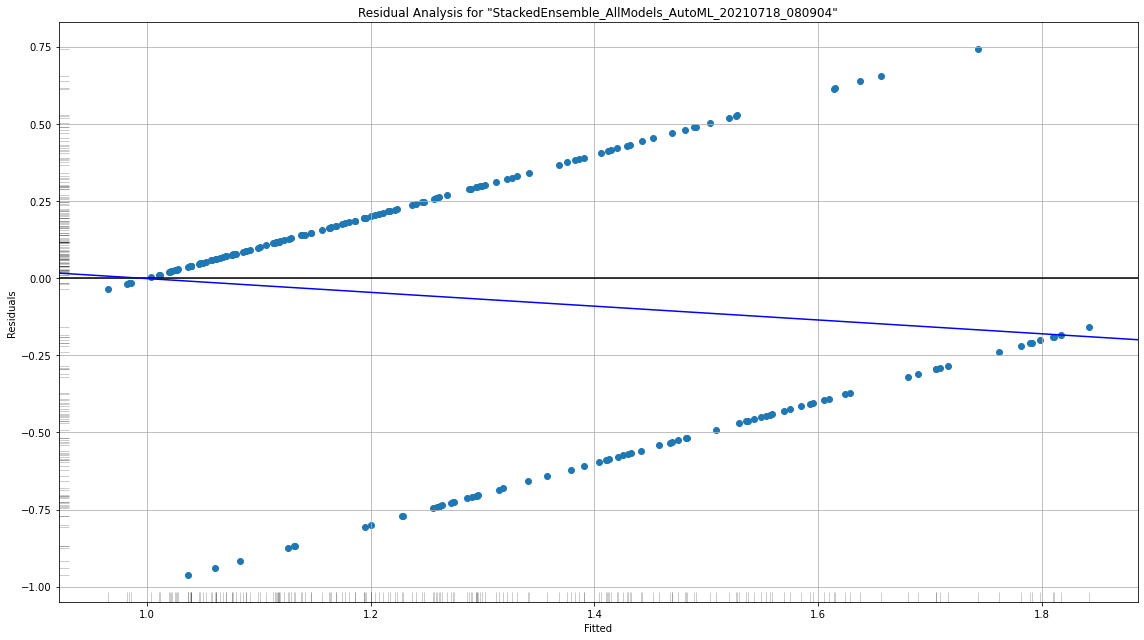

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

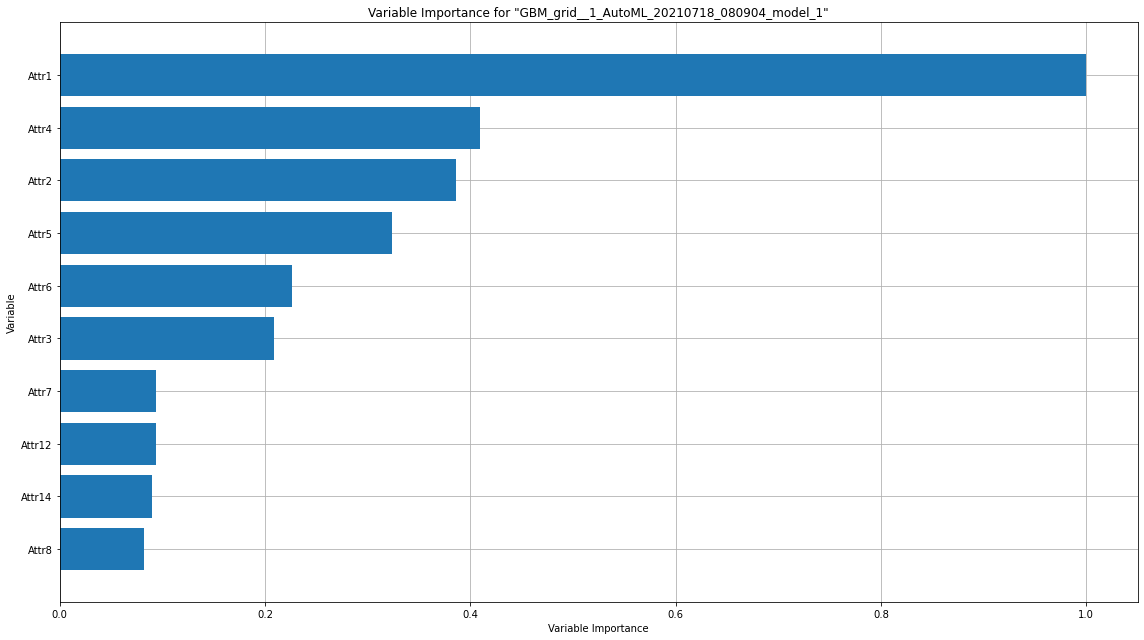

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

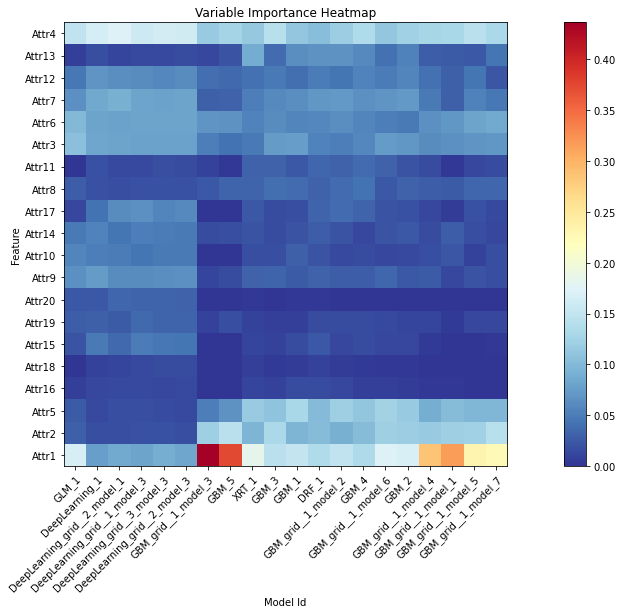

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

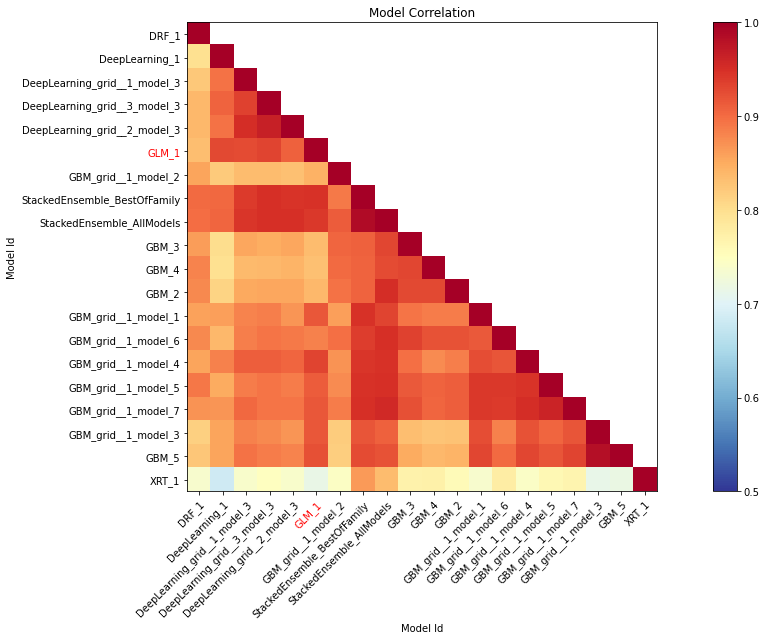

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

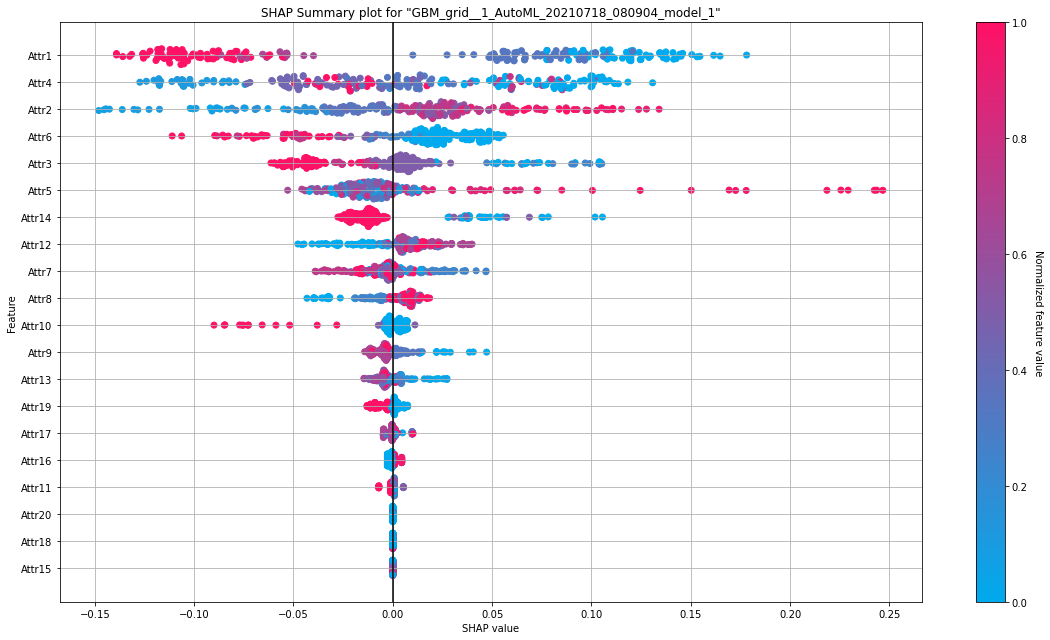

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

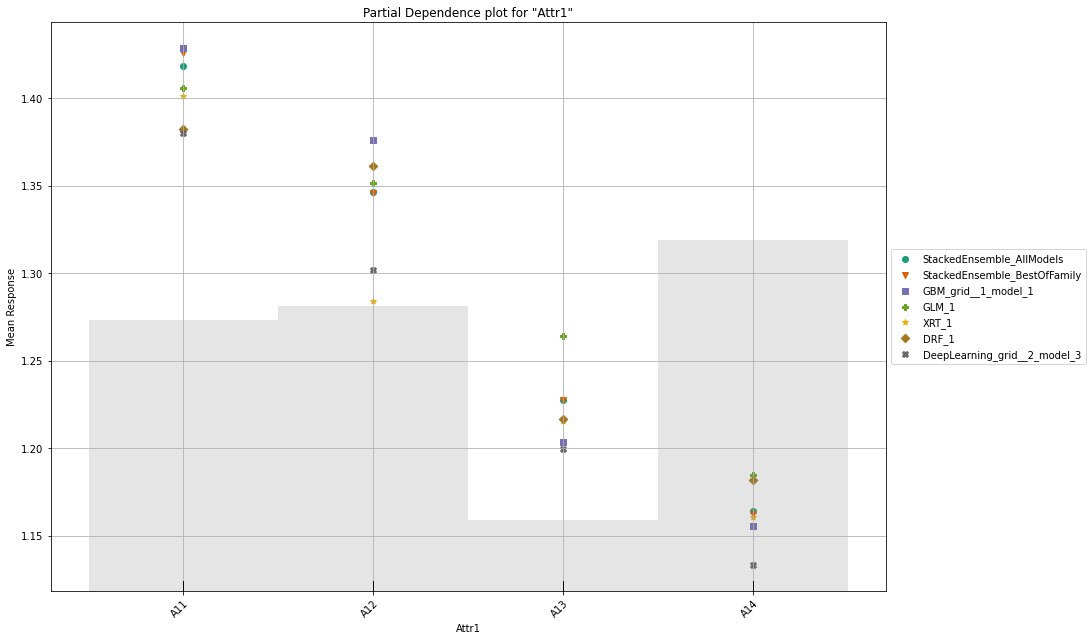

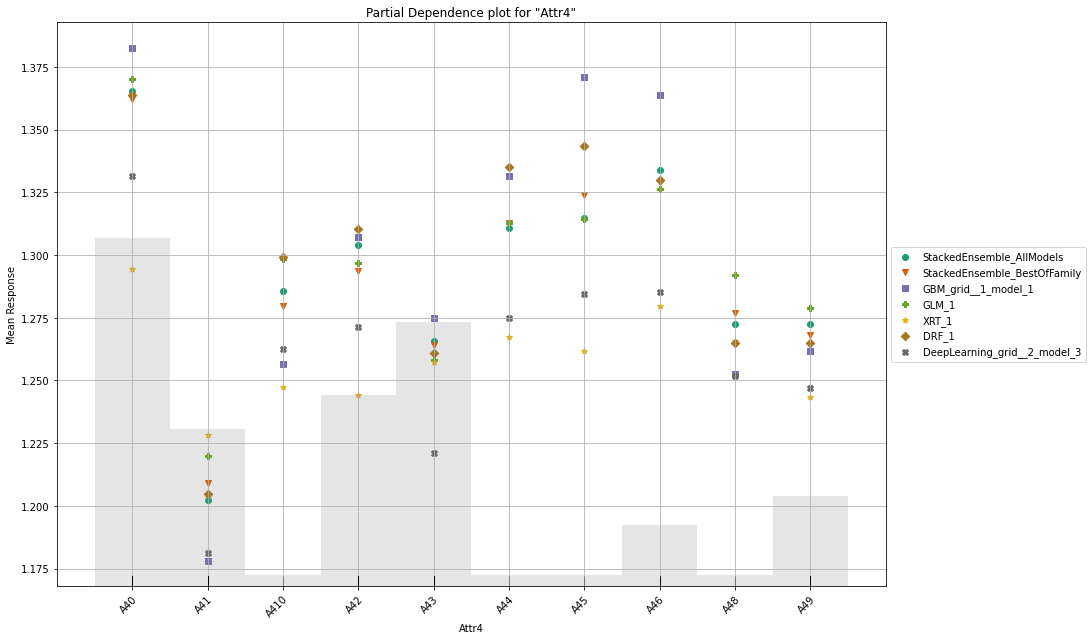

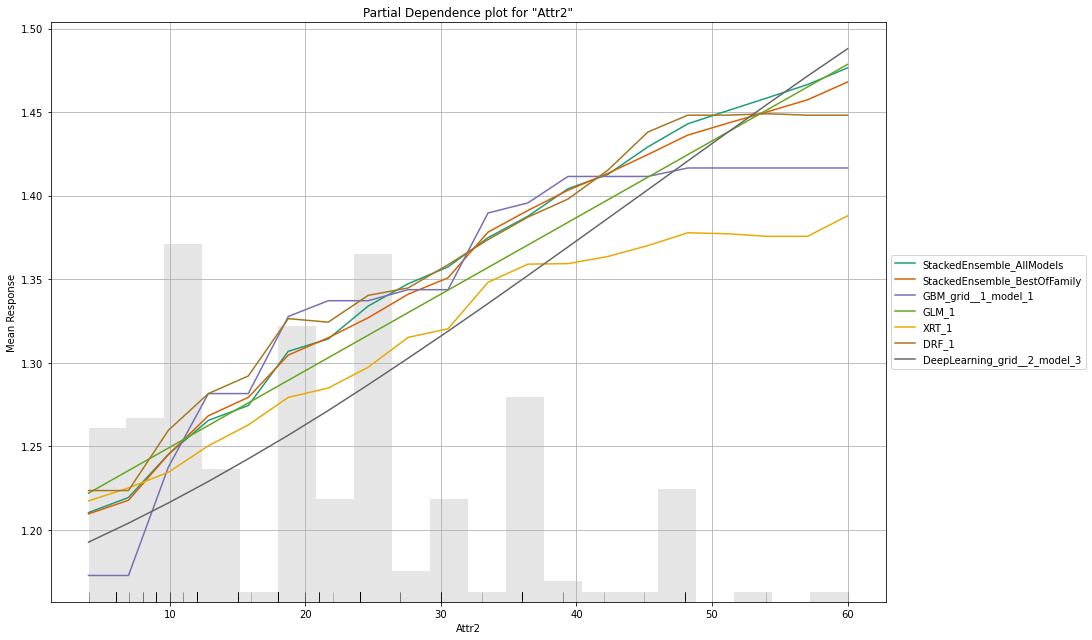

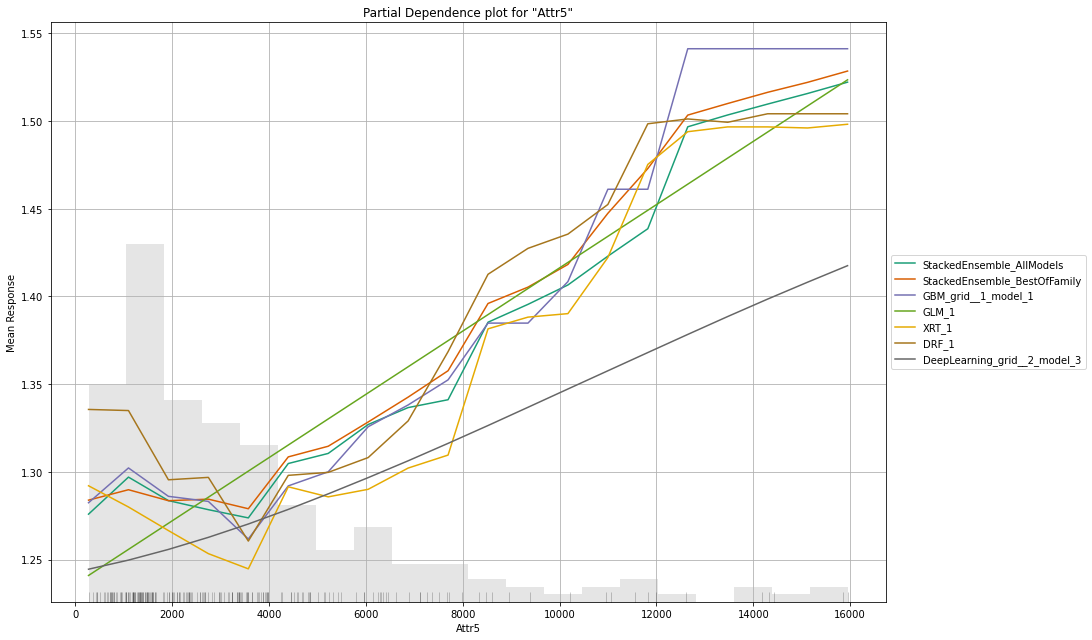

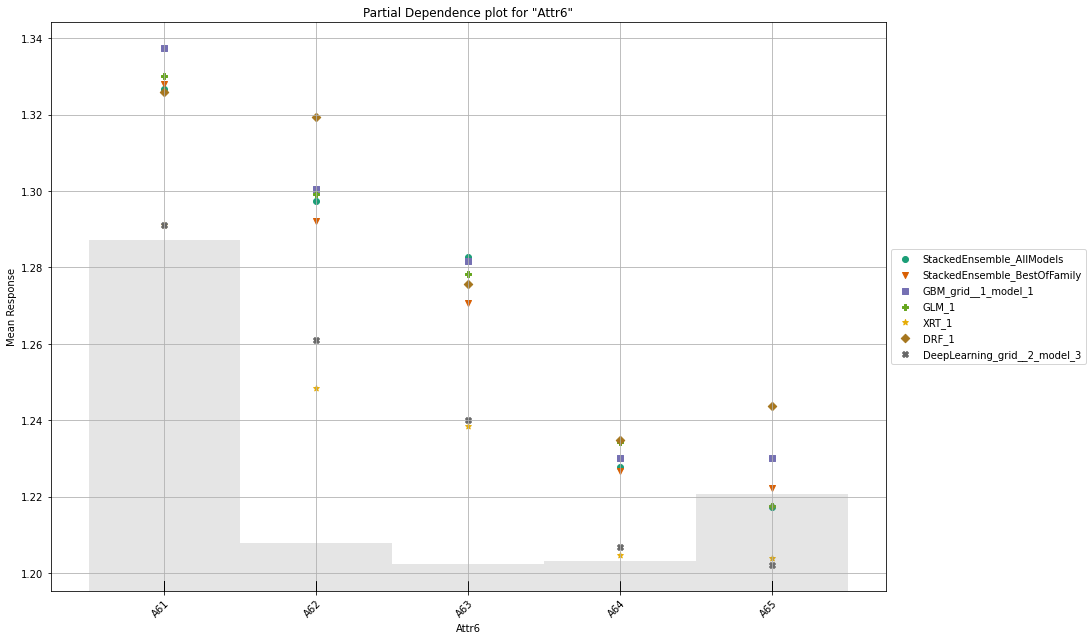

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

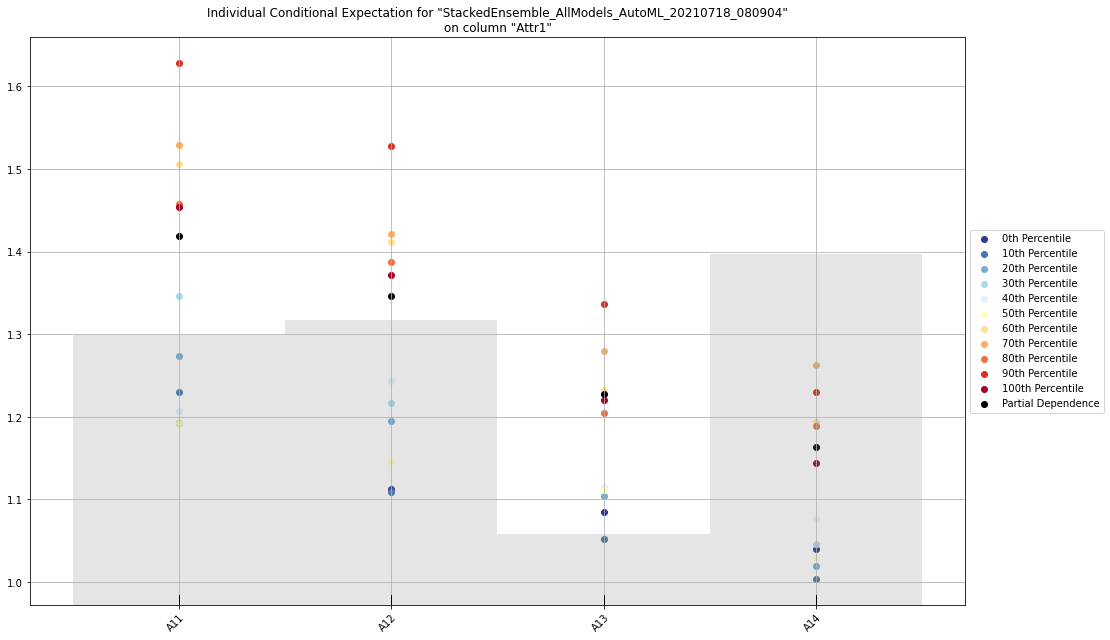

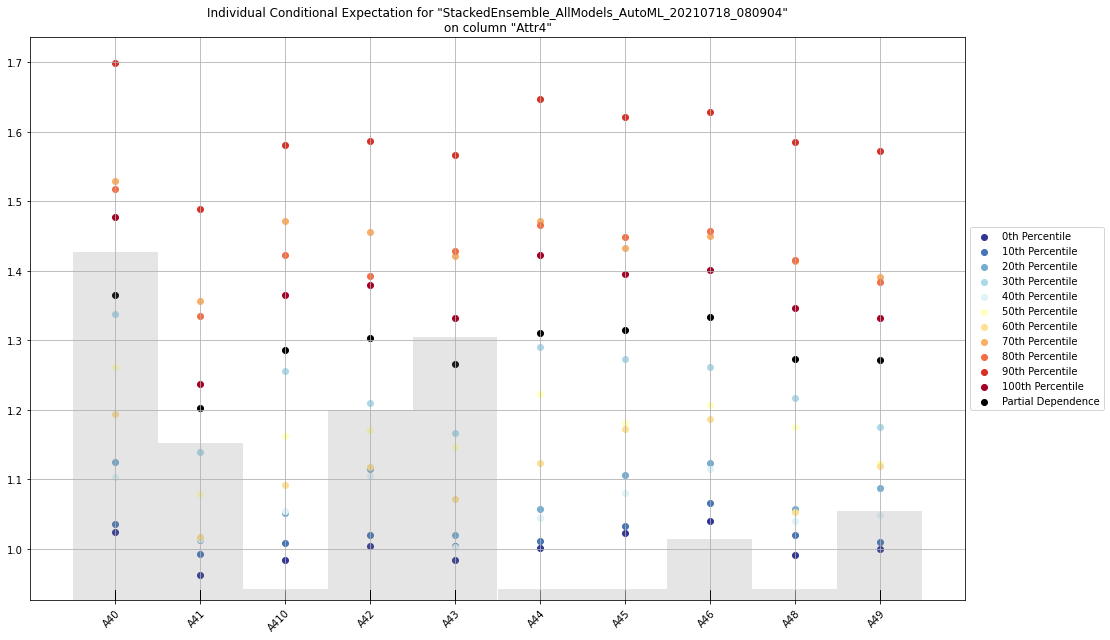

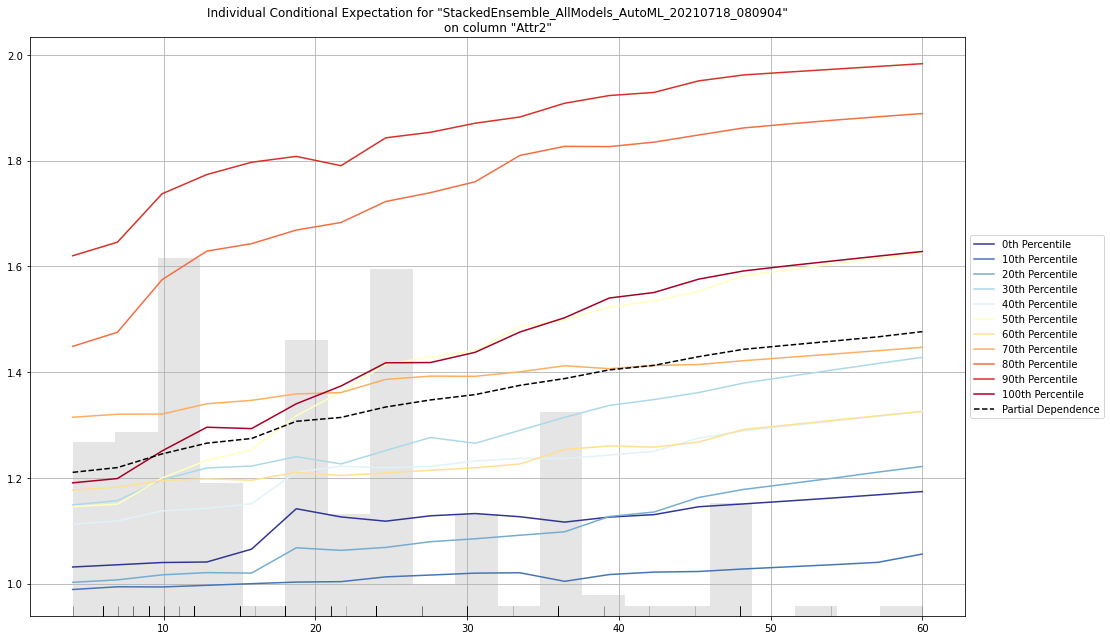

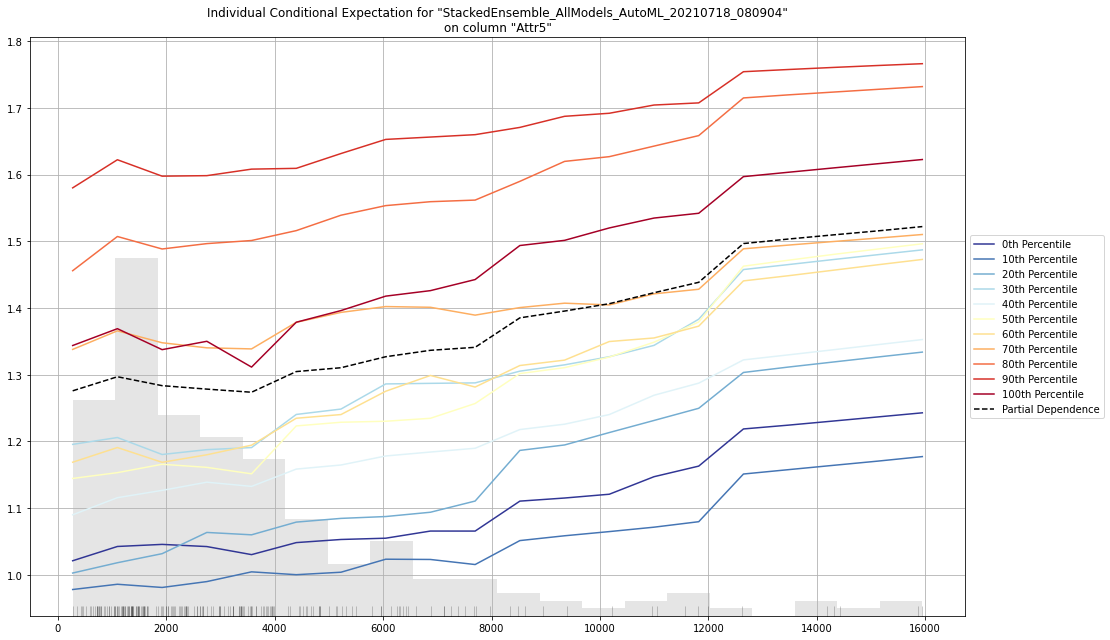

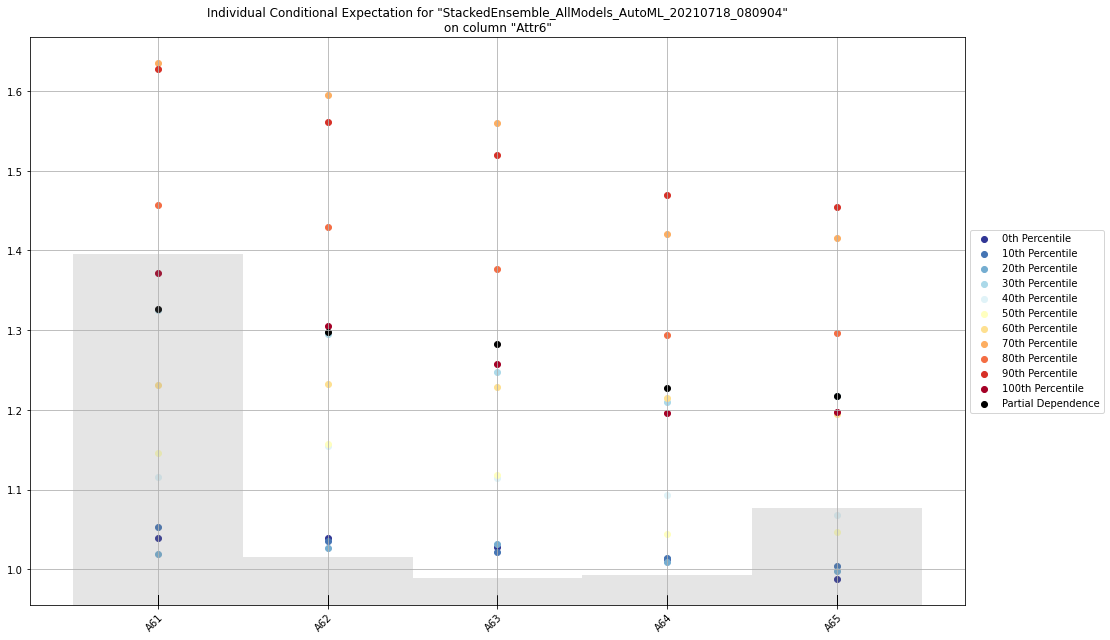

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

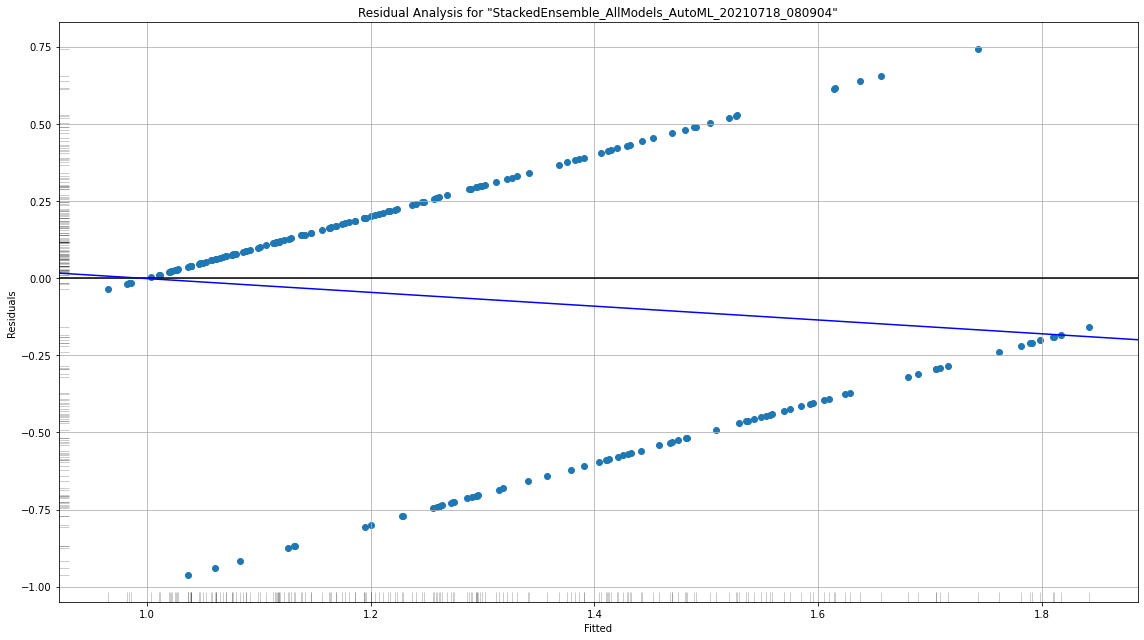

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

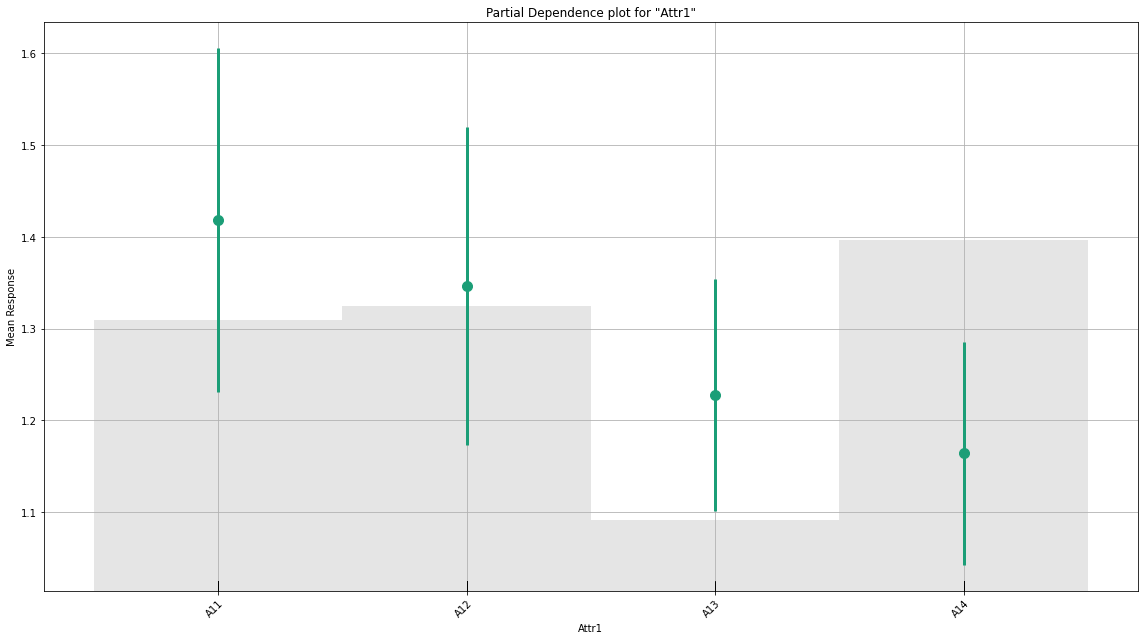

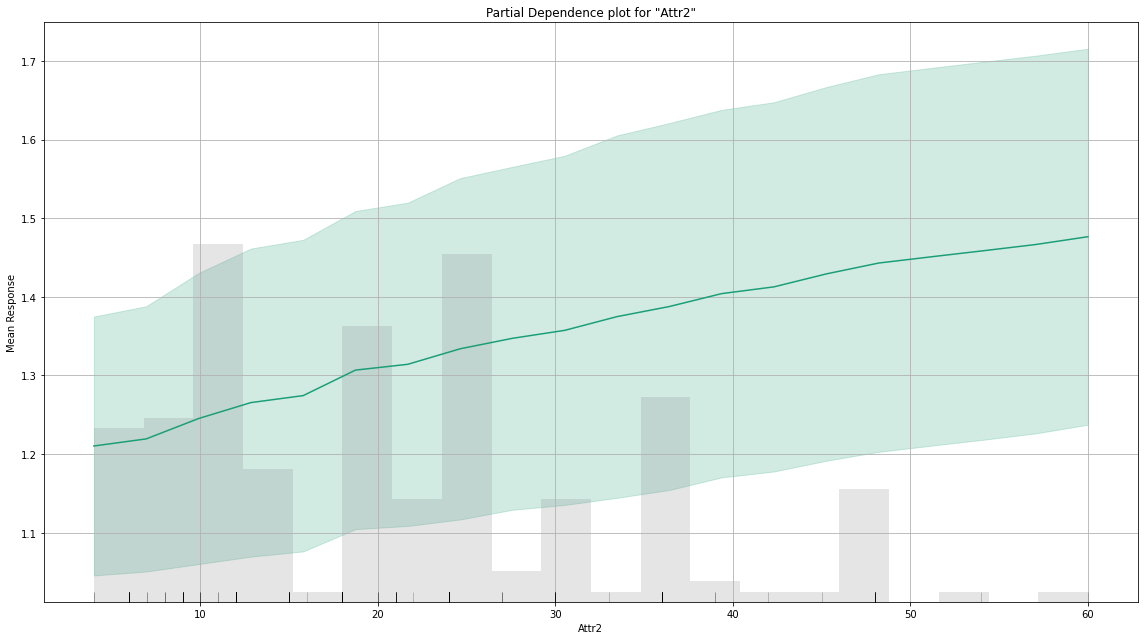

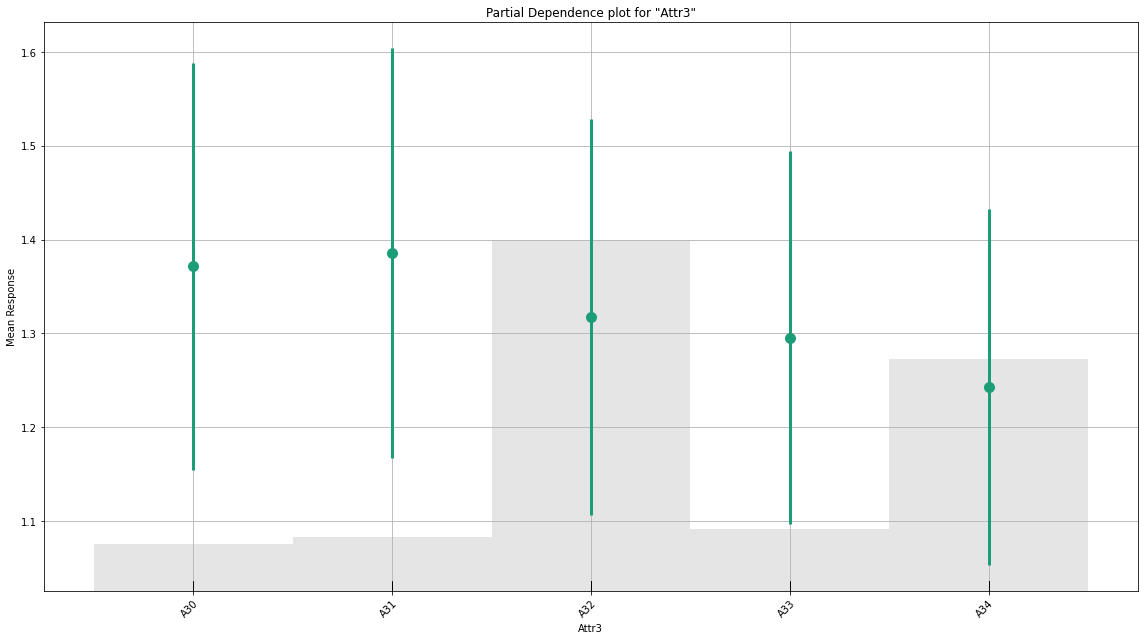

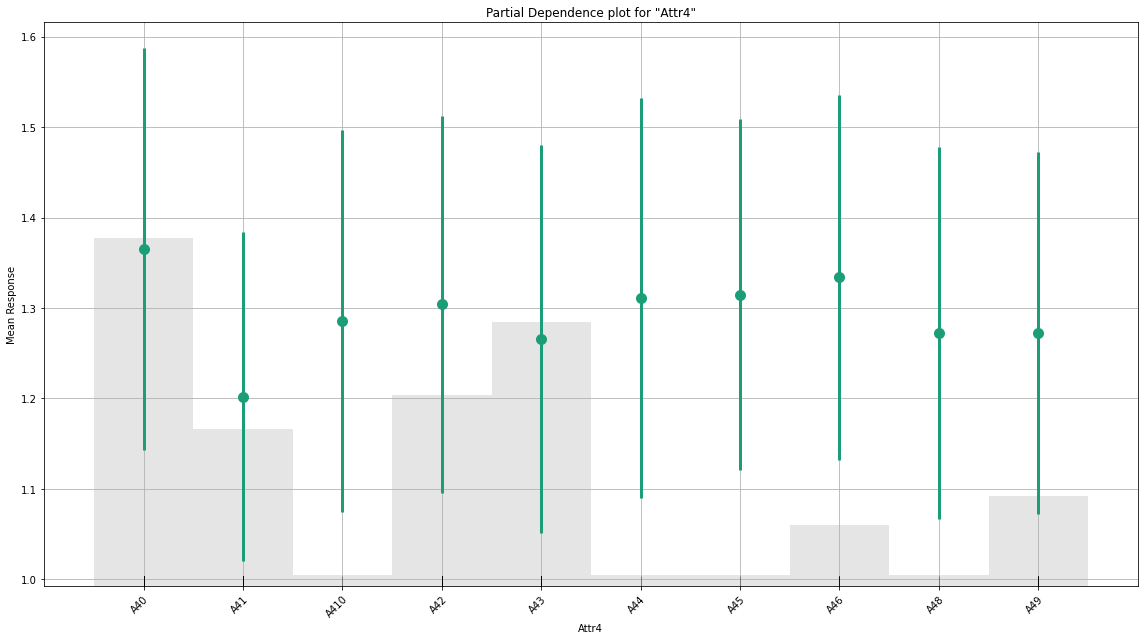

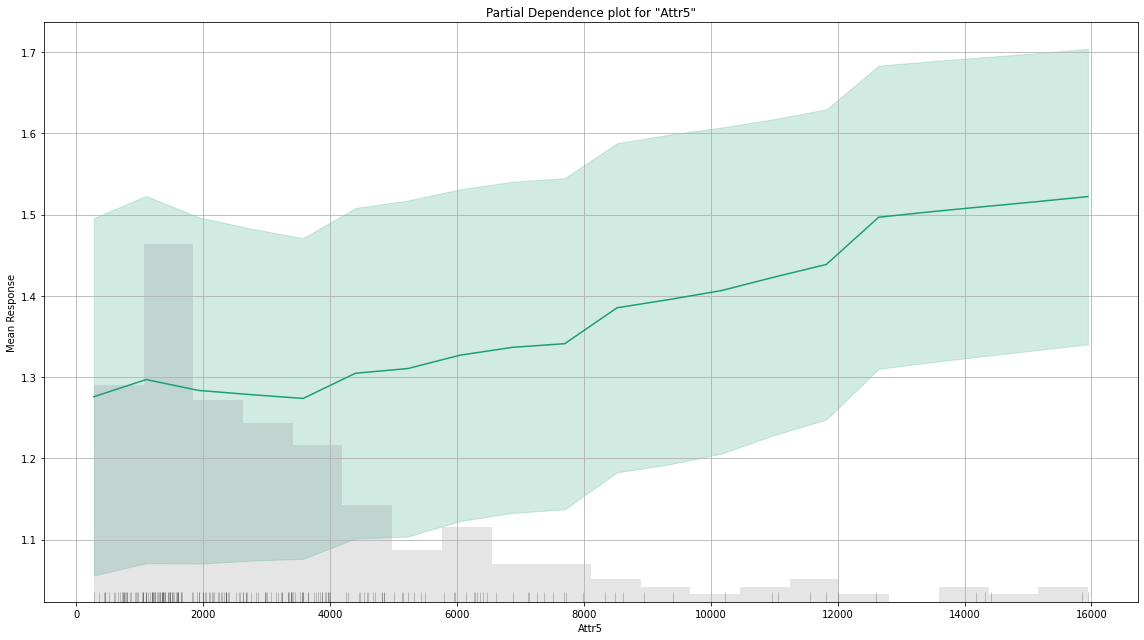

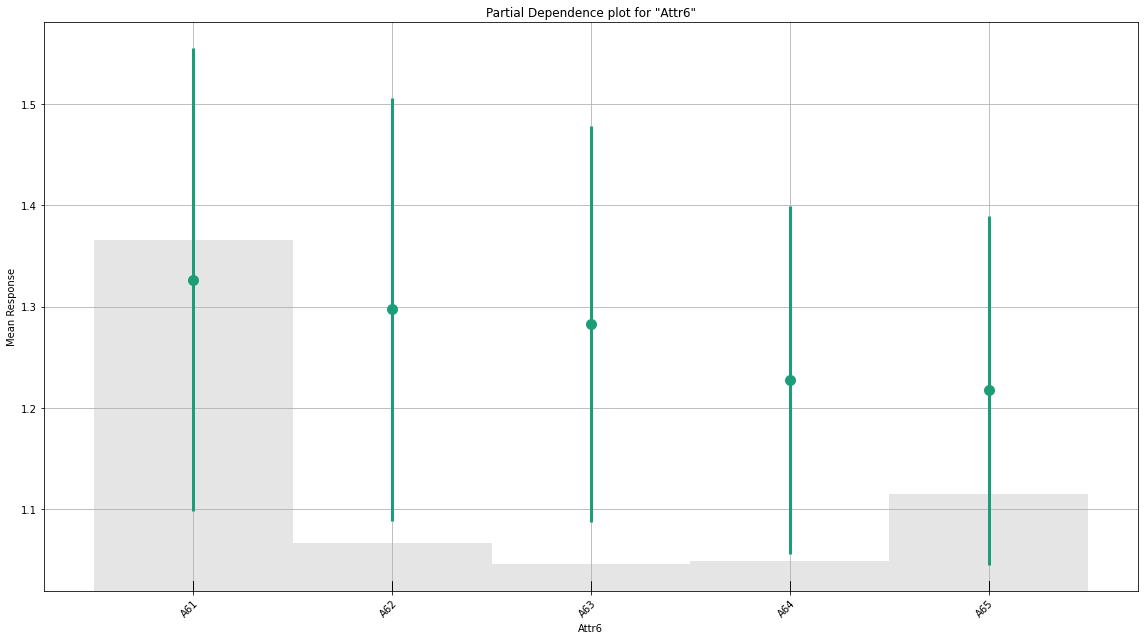

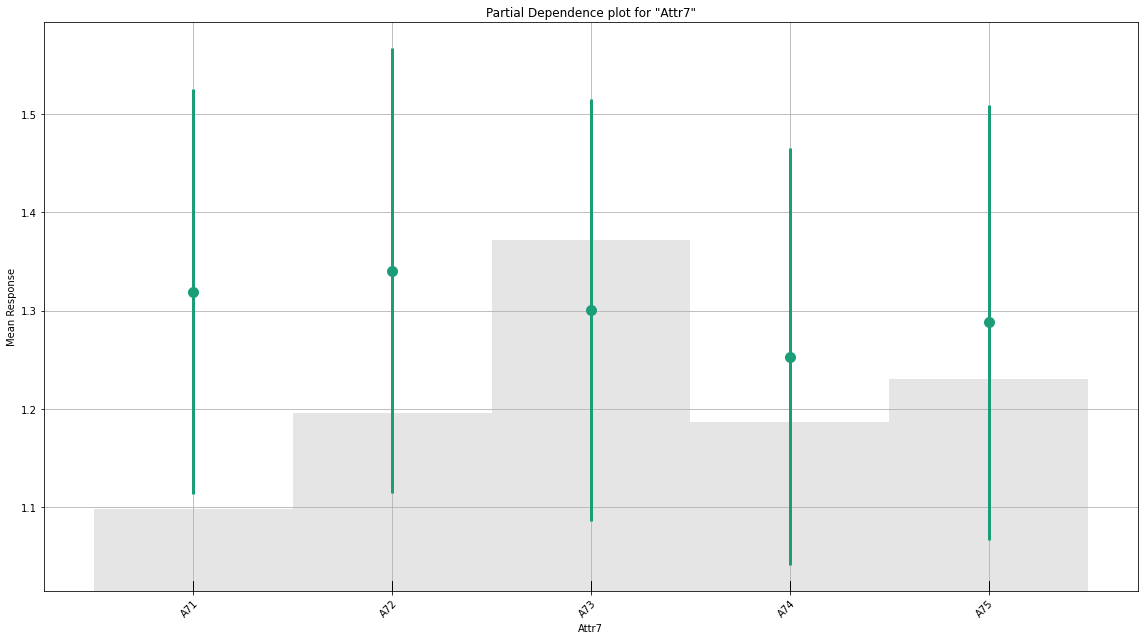

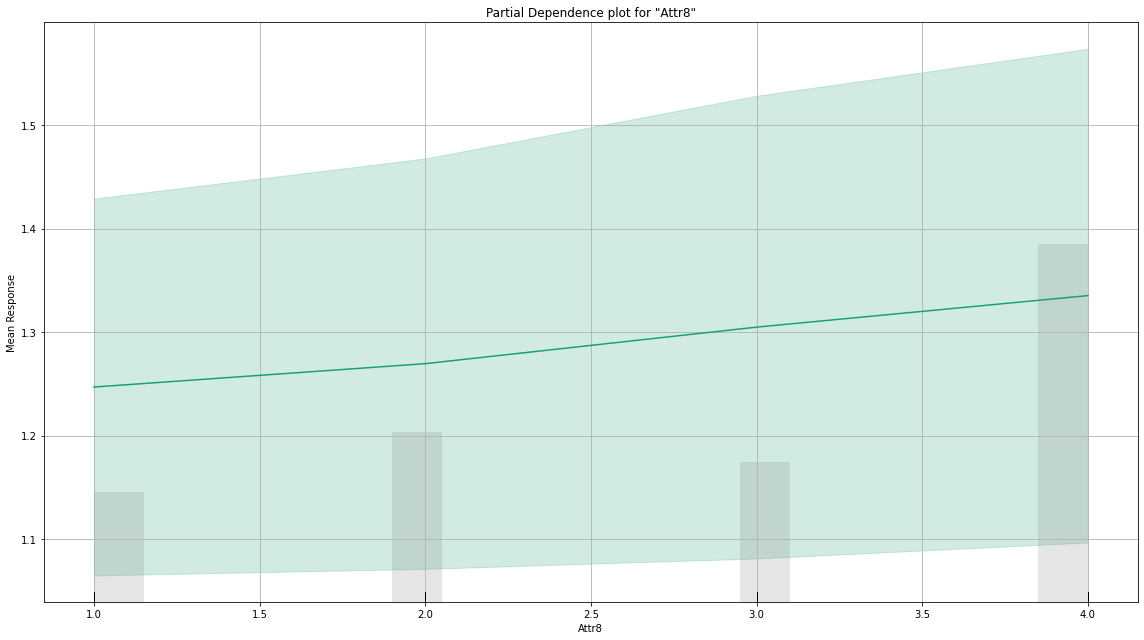

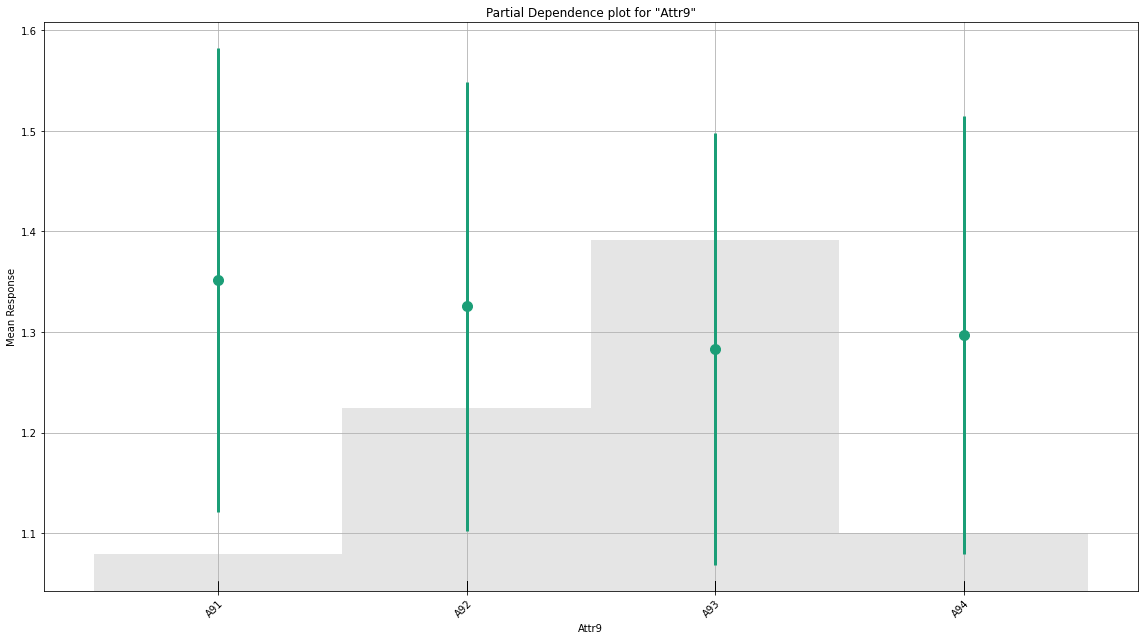

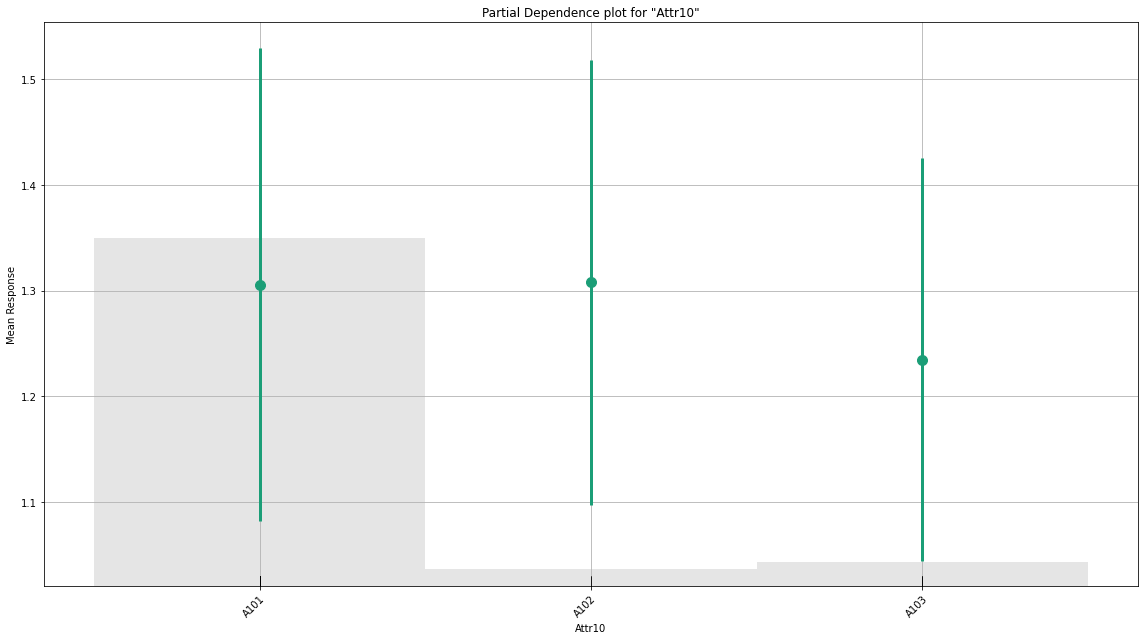

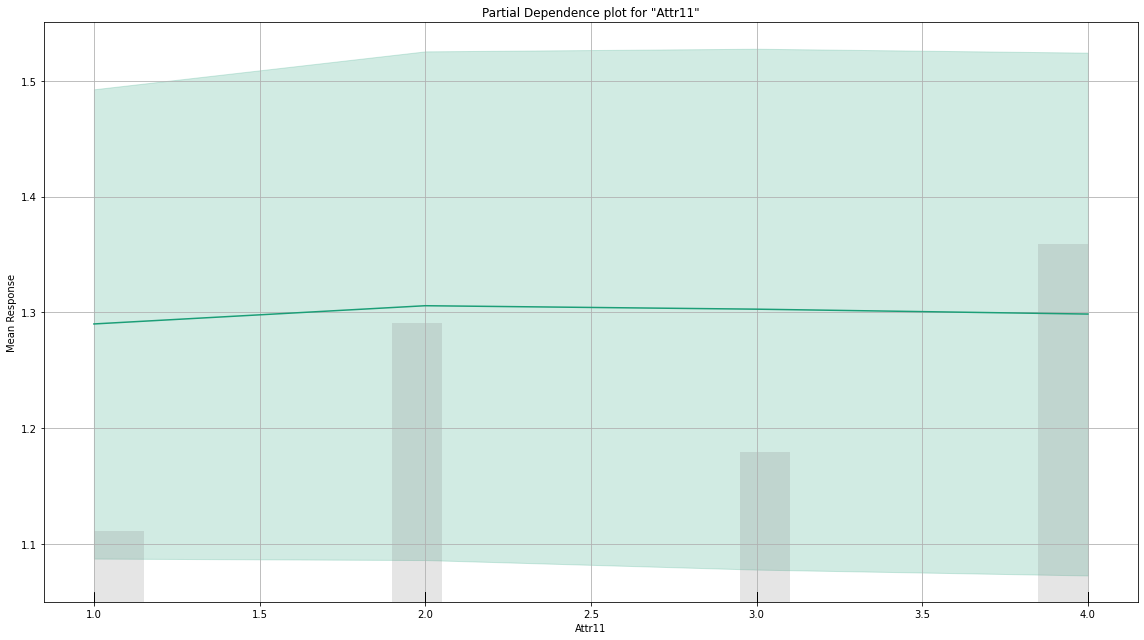

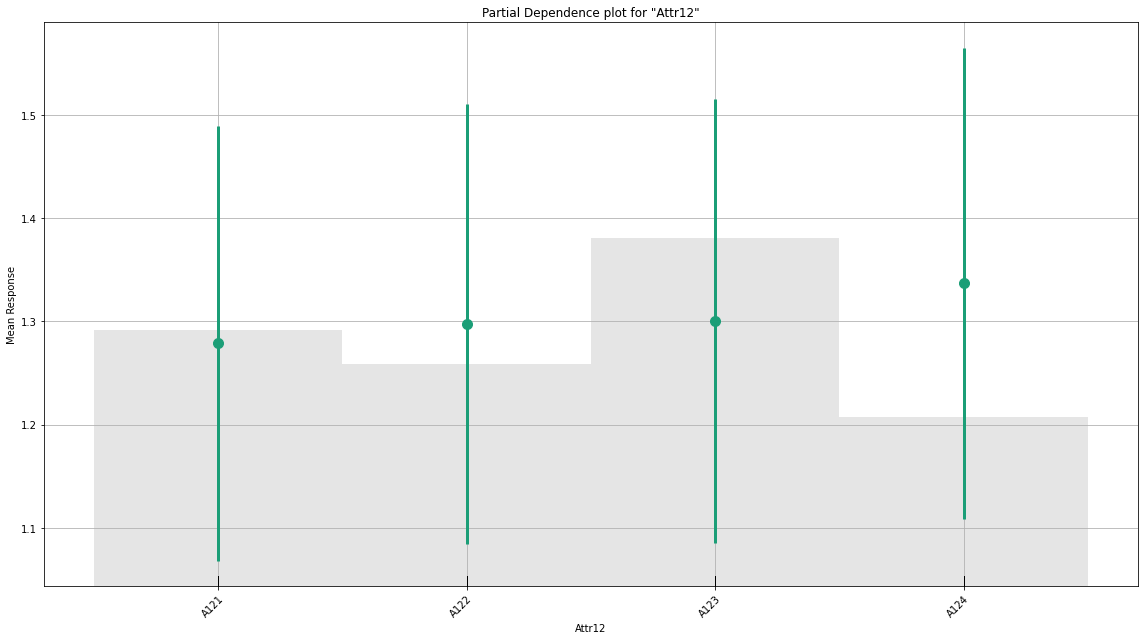

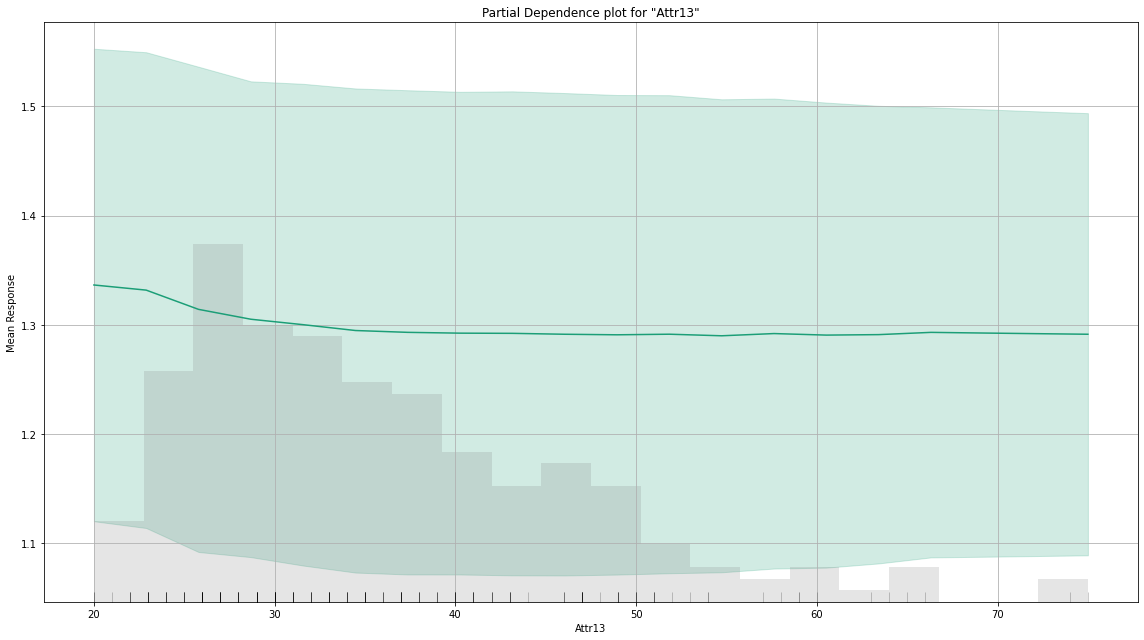

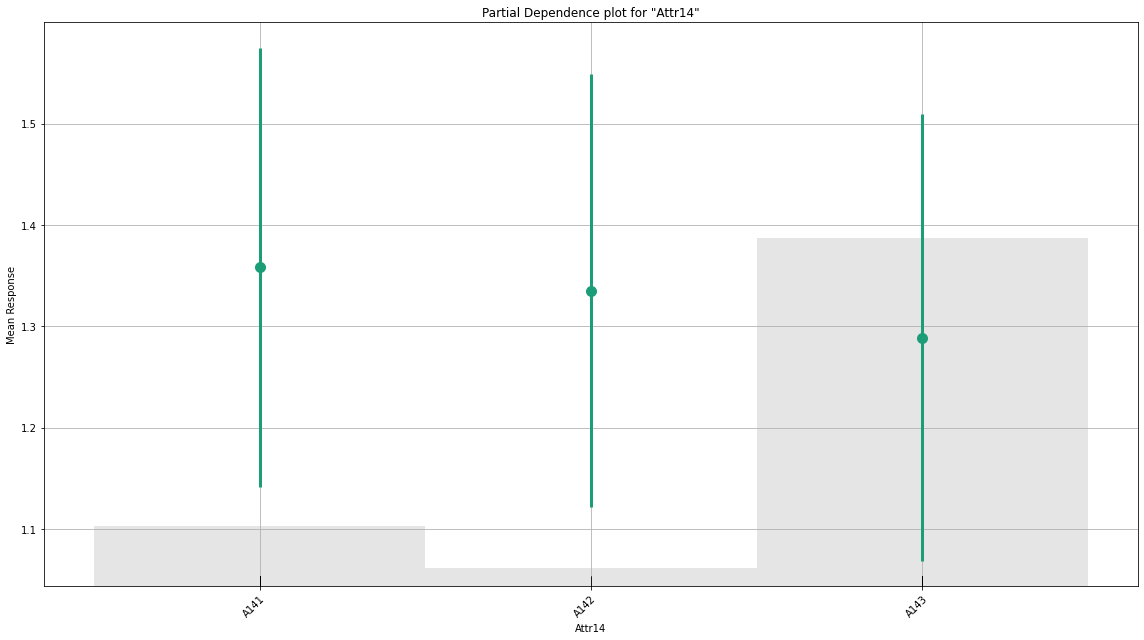

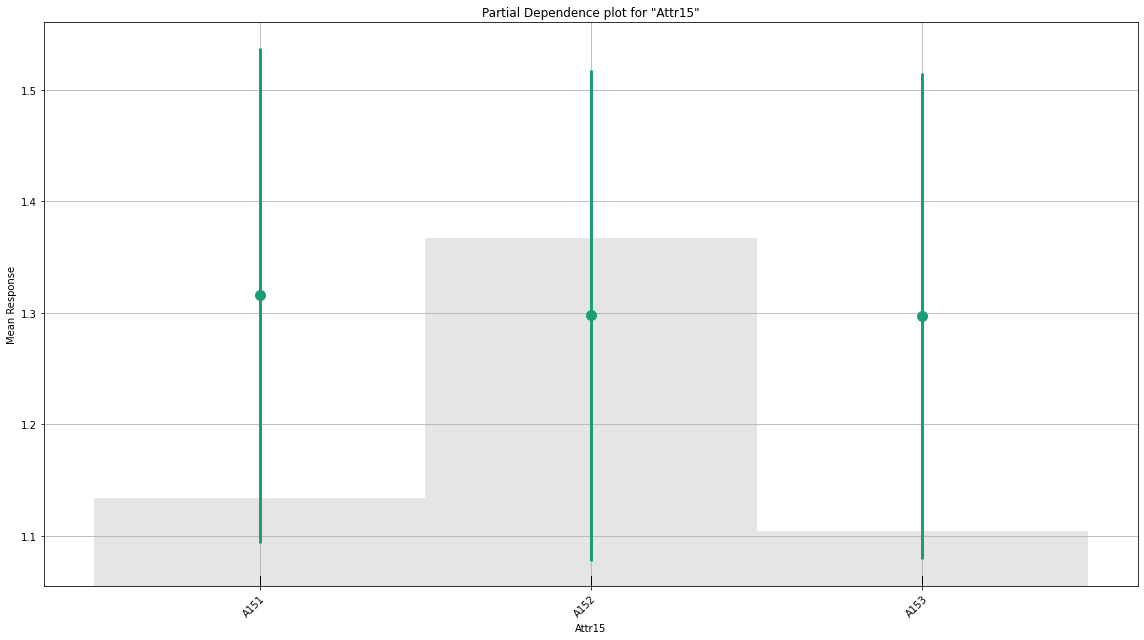

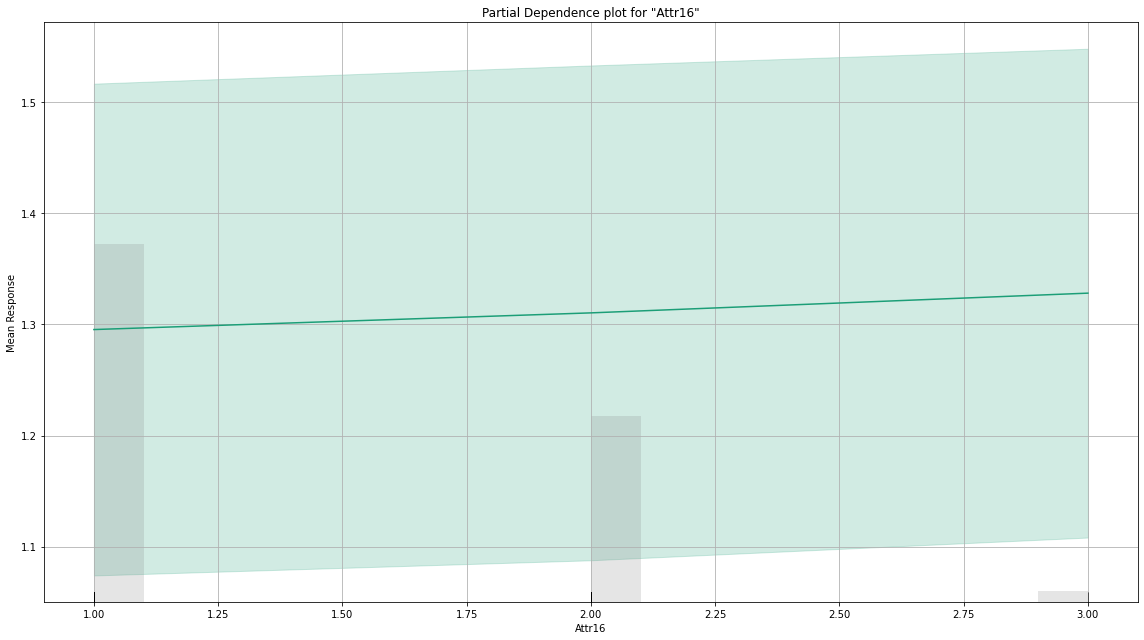

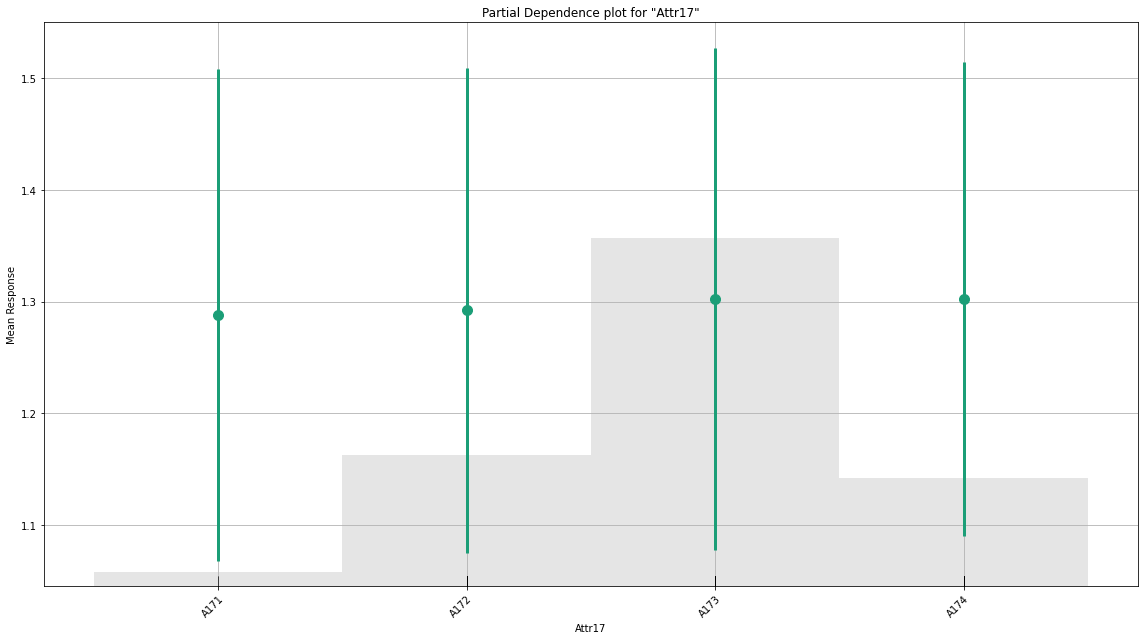

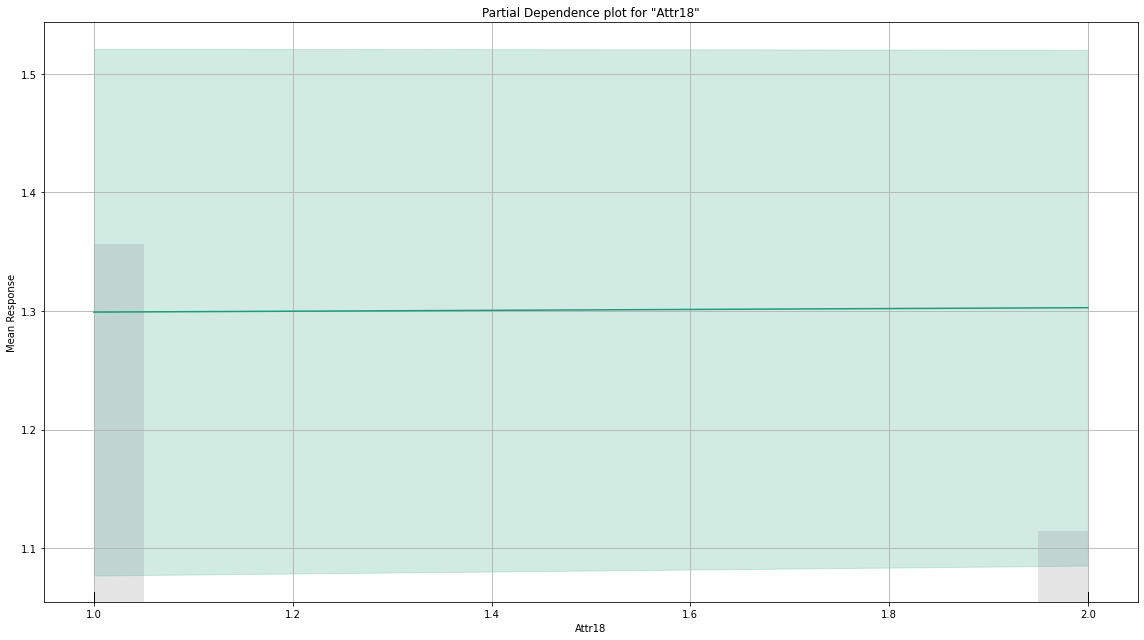

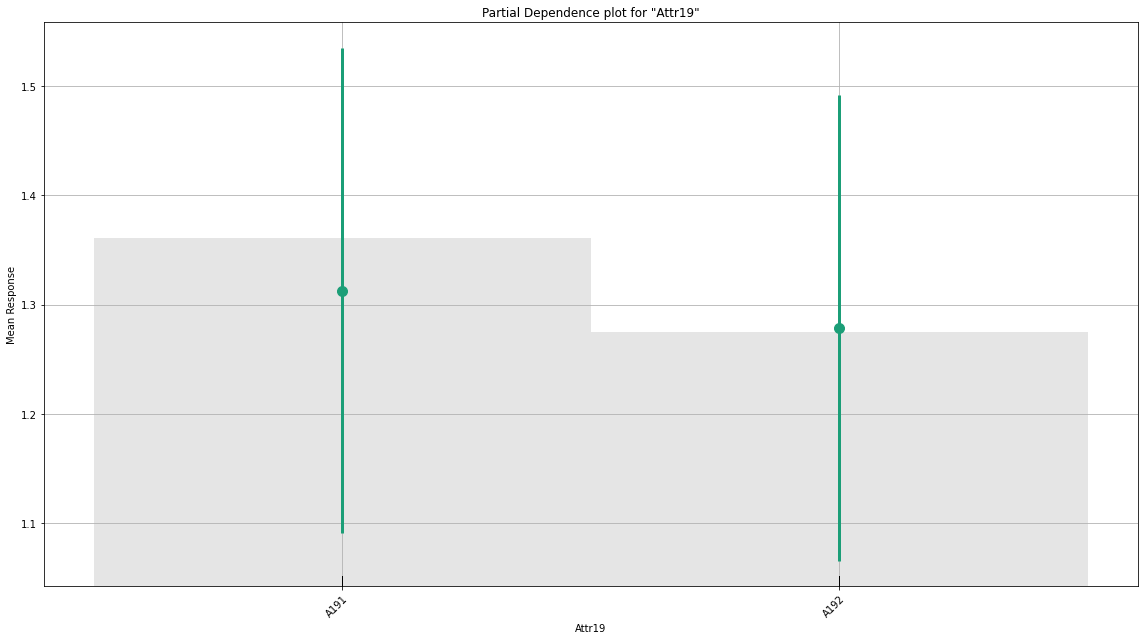

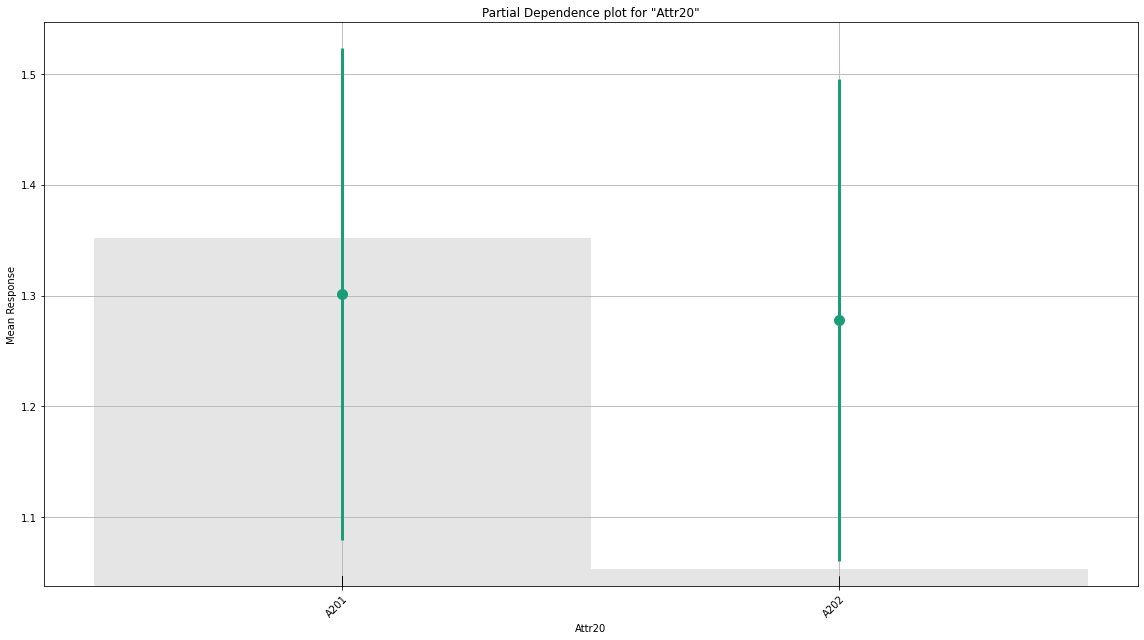

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

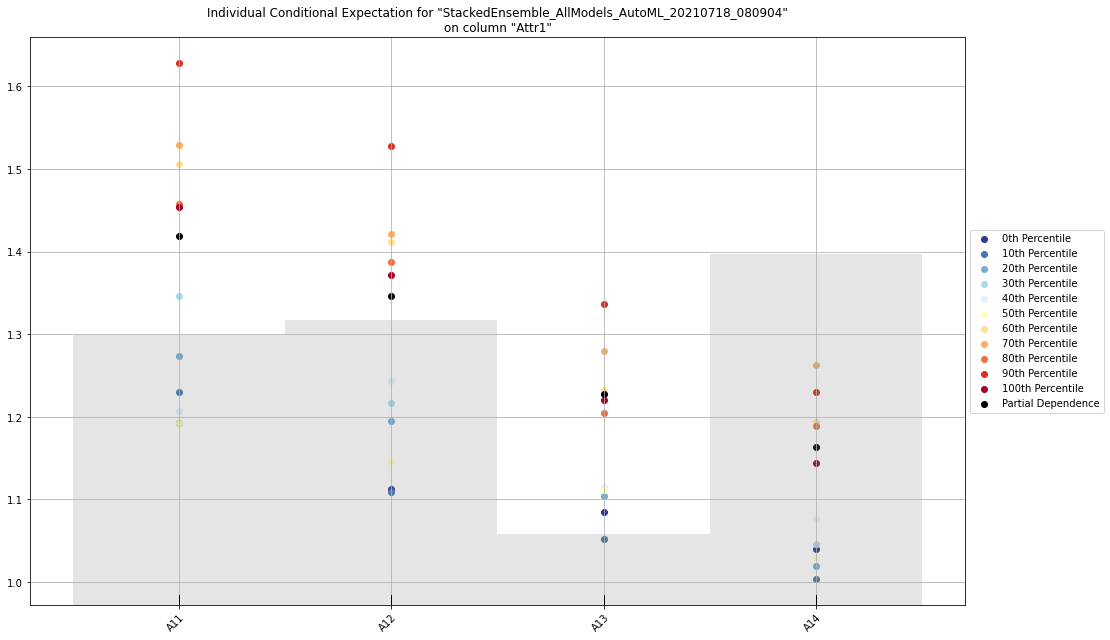

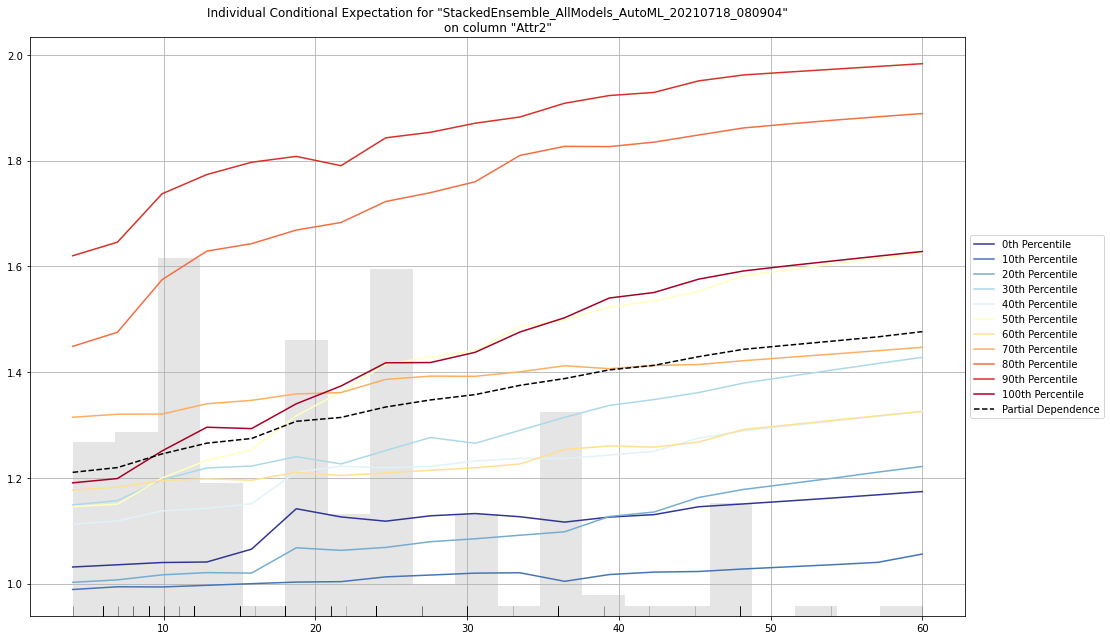

In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Import wine quality dataset
f = "german.csv"
df_h2 = h2o.import_file(f)

# Reponse column
y = "Attr21"

# Split into train & test
splits = df_h2.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

# Run AutoML for 1 minute
aml = H2OAutoML(max_runtime_secs=60, seed=1)
aml.train(y=y, training_frame=train)

# Explain leader model & compare with all AutoML models
exa = aml.explain(test)

# Explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test)

# Explain a generic list of models
# use h2o.explain as follows:
# exl = h2o.explain(model_list, test)
